In [15]:
# @title Setup
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd

project = 'postechanalyticsfase3' # Project ID inserted based on the query results selected to explore
location = 'southamerica-east1' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=postechanalyticsfase3:southamerica-east1:bquxjob_7dd1d0cc_195ac1cb4a1)
back to BigQuery to edit the query within the BigQuery user interface.

In [16]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_7dd1d0cc_195ac1cb4a1') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT '112020' as MesAno
      ,COUNT(CASE B00113 WHEN 1 THEN 1 ELSE NULL  END)  as Diarreia
      ,COUNT(CASE B0014  WHEN 1 THEN 1 ELSE NULL  END)  as DificuldadeRespirar
      ,COUNT(CASE B0015  WHEN 1 THEN 1 ELSE NULL  END)  as DorCabeca
      ,COUNT(CASE B0013  WHEN 1 THEN 1 ELSE NULL  END)  as DorGarganta
      ,COUNT(CASE B00112 WHEN 1 THEN 1 ELSE NULL  END)  as DorMuscular
      ,COUNT(CASE B0016  WHEN 1 THEN 1 ELSE NULL  END)  as DorPeito
      ,COUNT(CASE B00110 WHEN 1 THEN 1 ELSE NULL  END)  as DorOlhos
      ,COUNT(CASE B0019  WHEN 1 THEN 1 ELSE NULL  END)  as Fadiga
      ,COUNT(CASE B0011  WHEN 1 THEN 1 ELSE NULL  END)  as Febre
      ,COUNT(CASE B0018  WHEN 1 THEN 1 ELSE NULL  END)  as NarizEntupidoEscorrendo
      ,COUNT(CASE B0017  WHEN 1 THEN 1 ELSE NULL  END)  as Nausea    
      ,COUNT(CASE B00111 WHEN 1 THEN 1 ELSE NULL  END)  as PerdaCheiroSabor
      ,COUNT(CASE B0012  WHEN 1 THEN 1 ELSE NULL  END)  as Tosse
      ,COUNT(*) TotalLinhas
FROM `PNAD_COVID.PNAD_COVID

# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API. The read_gbq_table [method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.pandas#bigframes_pandas_read_gbq_function) turns a BigQuery table into the BigFrames DataFrame.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [17]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_7dd1d0cc_195ac1cb4a1') # Job ID inserted based on the query results selected to explore
destination = job.destination

# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")
bq_df

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Reading cached table from 2025-03-20 00:40:21.268270+00:00 to avoid incompatibilies with previous reads of this table. To read the latest version, set `use_cache=False` or close the current session with Session.close() or bigframes.pandas.close_session().
  exec(code_obj, self.user_global_ns, self.user_ns)


,MesAno,Diarreia,DificuldadeRespirar,DorCabeca,DorGarganta,DorMuscular,DorPeito,DorOlhos,Fadiga,Febre,NarizEntupidoEscorrendo,Nausea,PerdaCheiroSabor,Tosse,TotalLinhas
0,092020,1570,1820,7212,4239,4018,1321,1450,2935,3084,5927,1391,1632,5540,387298
1,052020,0,5081,17795,8994,10640,4178,4848,5953,8448,13422,3850,6150,12099,349306
2,082020,2181,2548,9783,6437,5611,1864,2159,3890,4880,8579,2031,2578,7863,386520
3,112020,1449,1538,5946,4445,3582,1065,1157,2712,3168,5349,1292,1467,5259,381438
4,062020,0,3735,13588,7018,7891,3023,3618,4569,6545,10059,2884,4402,8973,381270
5,072020,2832,3042,11553,6757,6787,2422,2740,4545,5832,9111,2550,3394,8482,384166
6,102020,1282,1441,5802,3873,3283,1062,1064,2561,2768,4864,1275,1314,4574,380461


## Show descriptive statistics using describe()
Use the ```DataFrame.describe()```
[method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.dataframe.DataFrame#bigframes_dataframe_DataFrame_describe)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [18]:
# Generate descriptive statistics.
bq_df.describe()

,Diarreia,DificuldadeRespirar,DorCabeca,DorGarganta,DorMuscular,DorPeito,DorOlhos,Fadiga,Febre,NarizEntupidoEscorrendo,Nausea,PerdaCheiroSabor,Tosse,TotalLinhas
count,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
mean,1330.571429,2743.571429,10239.857143,5966.142857,5973.142857,2133.571429,2433.714286,3880.714286,4960.714286,8187.285714,2181.857143,2991.0,7541.428571,378637.0
std,1048.178397,1327.710417,4425.739314,1861.882061,2677.942583,1160.245212,1406.792891,1239.044082,2120.560202,3058.355261,972.426763,1792.808133,2640.383991,13204.401274
min,0.0,1441.0,5802.0,3873.0,3283.0,1062.0,1064.0,2561.0,2768.0,4864.0,1275.0,1314.0,4574.0,349306.0
25%,0.0,1538.0,5946.0,4239.0,3582.0,1065.0,1157.0,2712.0,3084.0,5349.0,1292.0,1467.0,5259.0,380461.0
50%,1449.0,2548.0,9783.0,6437.0,5611.0,1864.0,2159.0,3890.0,4880.0,8579.0,2031.0,2578.0,7863.0,381438.0
75%,2181.0,3735.0,13588.0,7018.0,7891.0,3023.0,3618.0,4569.0,6545.0,10059.0,2884.0,4402.0,8973.0,386520.0
max,2832.0,5081.0,17795.0,8994.0,10640.0,4178.0,4848.0,5953.0,8448.0,13422.0,3850.0,6150.0,12099.0,387298.0


In [19]:
# Convert BigQuery DataFrame to pandas DataFrame.
pandas_df = bq_df.to_pandas()

/usr/local/lib/python3.10/dist-packages/bigframes/core/blocks.py:142: NullIndexPreviewWarning: Creating object with Null Index. Null Index is a preview feature.
  warnings.warn(msg, category=bfe.NullIndexPreviewWarning)


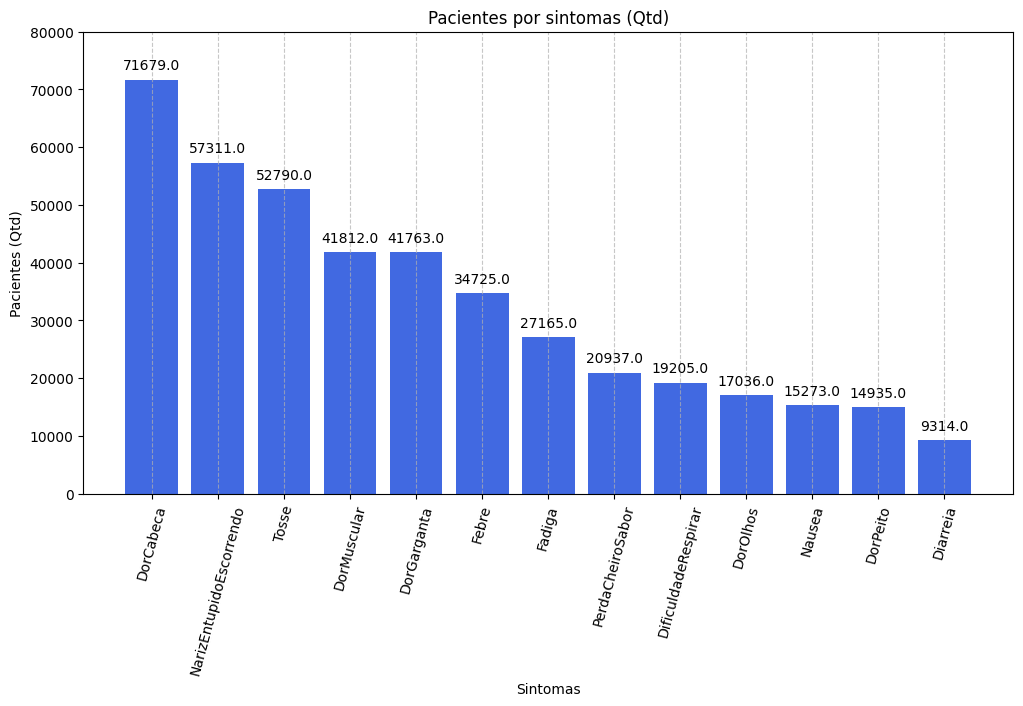

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que bq_df já esteja carregado
# Removendo as colunas 'MesAno' e 'TotalLinhas' se existirem
colunas_sintomas = bq_df.columns.difference(['MesAno', 'TotalLinhas'])

# Somando os valores de cada coluna
soma_sintomas = bq_df[colunas_sintomas].sum()

# Ordenando do maior para o menor
soma_sintomas = soma_sintomas.sort_values(ascending=False)

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Criando o gráfico de barras horizontais
barras = ax.bar(soma_sintomas.index, soma_sintomas.values, color='royalblue')

# Adicionando rótulos diretamente nas barras
ax.bar_label(barras, fmt='%.1f', padding=5, fontsize=10, color='black')

# Personalizando o gráfico
ax.set_xlabel("Sintomas")
ax.set_ylabel("Pacientes (Qtd)")
ax.set_ylim(0,80000)
ax.set_title("Pacientes por sintomas (Qtd)")
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=75)

# Exibindo o gráfico
plt.show()
